In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [5]:
benchmark_df = pd.read_json("benchmark.jsonl", lines=True)
benchmark_df = benchmark_df[["task_id", "approx_token_count"]]
benchmark_df.head()

,task_id,approx_token_count
0,LongBench_HumanEval/100_0_first half,0
1,LongBench_HumanEval/100_0_second half,0
2,LongBench_HumanEval/13_0_first half,0
3,LongBench_HumanEval/13_0_second half,0
4,LongBench_HumanEval/152_0_first half,0


In [6]:
executions_df = pd.read_json("executions_starcoderbase15b.jsonl", lines=True)
executions_df.head()

,task_id,executions
0,LongBench_HumanEval/100_0_first half,"[{'program': ' def make_a_pile(n): """""" ..."
1,LongBench_HumanEval/100_0_second half,"[{'program': ' def make_a_pile(n): """""" ..."
2,LongBench_HumanEval/13_0_first half,[{'program': ' def greatest_common_divisor(a:...
3,LongBench_HumanEval/13_0_second half,[{'program': ' def greatest_common_divisor(a:...
4,LongBench_HumanEval/152_0_first half,"[{'program': ' def compare(game,guess): """"..."


In [28]:
def mutant_catch_rate(execution):
    if execution["exit_code"] != 0:
        return 0
    mutants = execution["mutants"]
    caught_mutants = sum(1 for mutant in mutants if mutant["exit_code"] != 0)
    return caught_mutants / len(mutants)

def mean_mutant_catch_rate(executions):
    n = len(executions)
    if n == 0:
        return 0
    return sum(mutant_catch_rate(execution) for execution in executions) / n


def test_suite_success_rate(executions):
    n = len(executions)
    if n == 0:
        return 0
    return sum(1 for execution in executions if execution["exit_code"] == 0) / n

combined_df = pd.merge(benchmark_df, executions_df, on="task_id")
combined_df["mutant_catch_rate"] = executions_df["executions"].apply(mean_mutant_catch_rate)
combined_df["test_suite_success_rate"] = executions_df["executions"].apply(test_suite_success_rate)
combined_df = combined_df[["task_id", "approx_token_count", "mutant_catch_rate", "test_suite_success_rate"]]
combined_df.head()

,task_id,approx_token_count,mutant_catch_rate,test_suite_success_rate
0,LongBench_HumanEval/100_0_first half,0,0.0000,0.00
1,LongBench_HumanEval/100_0_second half,0,0.0000,0.00
2,LongBench_HumanEval/13_0_first half,0,0.1625,0.20
3,LongBench_HumanEval/13_0_second half,0,0.1500,0.15
4,LongBench_HumanEval/152_0_first half,0,0.0000,0.00


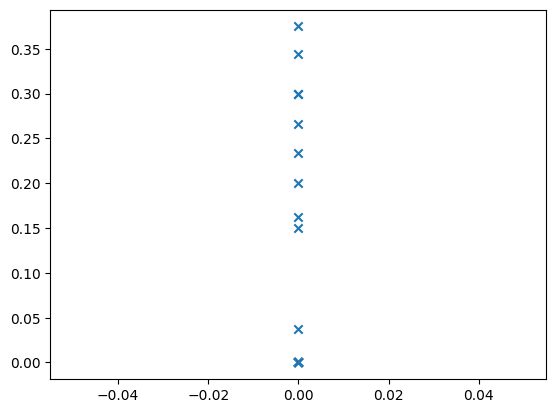

In [22]:
# Plot size on X and pass1 on Y but as a CDF
plt.scatter(combined_df["approx_token_count"], combined_df["mutant_catch_rate"], marker = "x")

In [29]:
combined_df["mutant_catch_rate"].describe()

count    20.000000
mean      0.118438
std       0.140321
min       0.000000
25%       0.000000
50%       0.018750
75%       0.241667
max       0.375000
Name: mutant_catch_rate, dtype: float64

In [30]:
combined_df["test_suite_success_rate"].describe()

count    20.000000
mean      0.170000
std       0.214844
min       0.000000
25%       0.000000
50%       0.025000
75%       0.362500
max       0.600000
Name: test_suite_success_rate, dtype: float64